In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dynamic_pricing.csv")

In [3]:
print("First 5 rows:\n", df.head())
print("\nNull values:\n", df.isnull().sum())

First 5 rows:
    Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium           

In [4]:
int_cols = ["Number_of_Riders", "Number_of_Drivers", "Number_of_Past_Rides", "Expected_Ride_Duration"]
float_cols = ["Average_Ratings", "Historical_Cost_of_Ride"]
cat_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]

In [5]:
for c in int_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64")
for c in float_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
for c in cat_cols:
    df[c] = df[c].astype("string").str.strip()


In [6]:
# Handle missing values
df[int_cols + float_cols] = df[int_cols + float_cols].fillna(df[int_cols + float_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [7]:
df.loc[~df["Average_Ratings"].between(1, 5), "Average_Ratings"] = df["Average_Ratings"].median()


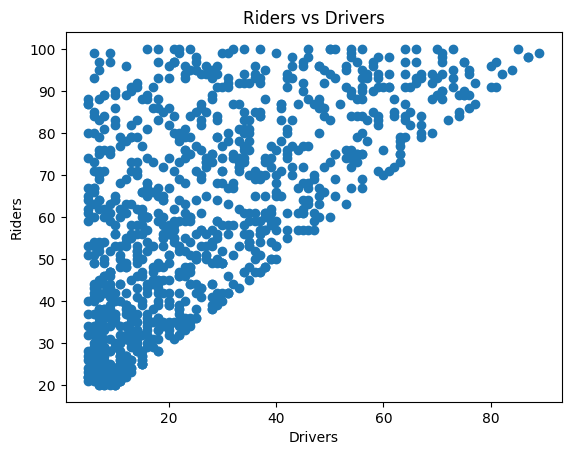

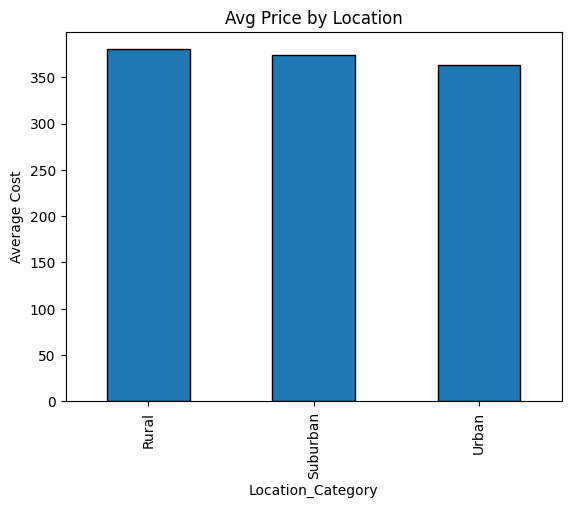

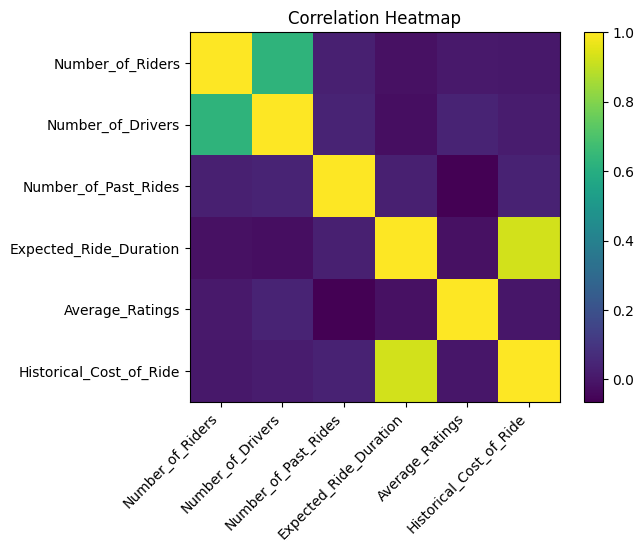

In [12]:
plt.scatter(df["Number_of_Drivers"], df["Number_of_Riders"])
plt.title("Riders vs Drivers")
plt.xlabel("Drivers")
plt.ylabel("Riders")
plt.show()
df.groupby("Location_Category")["Historical_Cost_of_Ride"].mean().plot(kind="bar", edgecolor="black", title="Avg Price by Location")
plt.ylabel("Average Cost")
plt.show()
corr = df[int_cols + float_cols].corr()
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

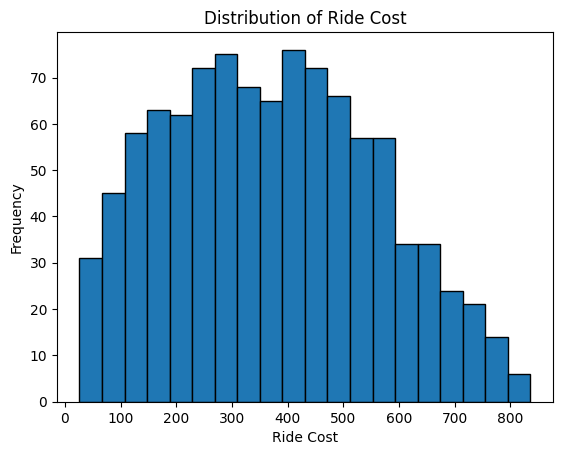

In [10]:
df["Historical_Cost_of_Ride"].plot(kind="hist", bins=20, edgecolor="black", title="Distribution of Ride Cost")
plt.xlabel("Ride Cost")
plt.show()

In [11]:
print("\nKPI Results:")
print("Average Historical Price:", round(df["Historical_Cost_of_Ride"].mean(), 2))
print("Median Historical Price:", round(df["Historical_Cost_of_Ride"].median(), 2))
print("Average Riders per Driver:", round((df["Number_of_Riders"]/df["Number_of_Drivers"]).mean(), 2))


KPI Results:
Average Historical Price: 372.5
Median Historical Price: 362.02
Average Riders per Driver: 3.24


In [13]:
df["Competitor_Price_Index"] = np.random.uniform(0.9, 1.1, size=len(df))
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / df["Expected_Ride_Duration"].replace(0, np.nan)
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / df["Number_of_Riders"].replace(0, np.nan)
df["Inventory_Health_Index"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1)
loyalty_map = {"Bronze": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map).fillna(0).astype(int)
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Evening", "Night"] else 0)
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / df["Number_of_Drivers"].replace(0, np.nan)
df["Supply_Tightness"] = df["Rider_Driver_Ratio"] * df["Peak"]
veh_map = {"Economy": 1.0, "Premium": 1.5}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(veh_map).fillna(1.0)
base_rate = 2.0
df["baseline_price"] = df["Expected_Ride_Duration"] * df["Vehicle_Factor"] * base_rate
df["competitor_price"] = df["baseline_price"] * df["Competitor_Price_Index"]
df["p_complete"] = 0.7 + (0.05 * df["Loyalty_Score"]) + (0.01 * df["Driver_to_Rider_Ratio"])
df["p_complete"] = df["p_complete"].clip(0, 1)
df["price"] = (df["baseline_price"] * 0.5 + df["competitor_price"] * 0.3 + (df["Supply_Tightness"] * 5) * 0.2)

print(df.head())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  